In [1]:
%load_ext autoreload
%autoreload 2

import ncem

datadir = '.'

# Load data

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='schuerch',
    data_path=datadir + '/schuerch/',
    radius=60,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


collecting image-wise celldata
adding graph-level covariates


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:05<00:00, 23.51it/s]

Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 21 distinct celltypes.
(258385, 21)
node_types
h_0 21
h_1 57
Mean of mean node degree per images across images: 10.311835

 Celldata metadata: {'lateral_resolution': 0.377442, 'fn': 'CRC_clusters_neighborhoods_markers_NEW.csv', 'image_col': 'File Name', 'pos_cols': ['X:X', 'Y:Y'], 'cluster_col': 'ClusterName', 'cluster_col_preprocessed': 'ClusterName_preprocessed', 'patient_col': 'patients'}


# Supp. Fig. 1: Cell-type centric summary statistics in CODEX - cancer dataset. 

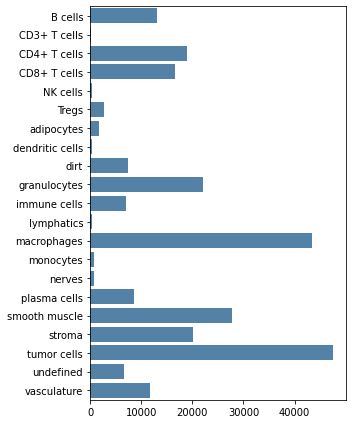

In [3]:
interpreter.data.celltype_frequencies()

0.0
2.56106902346913
3.42377817573414
8.151810911740514
40.28233341422723
154.010672671401
505.6835192555206
1845.519572674249


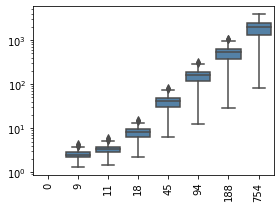

In [4]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 25, 30, 50, 120, 250, 500, 2000],
    lateral_resolution=0.377442,
)

# Supp. Fig. 2: Variance decomposition in CODEX - cancer dataset.

  0%|                                                                                                                     | 0/140 [00:00<?, ?it/s]/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [01:31<00:00,  1.54it/s]


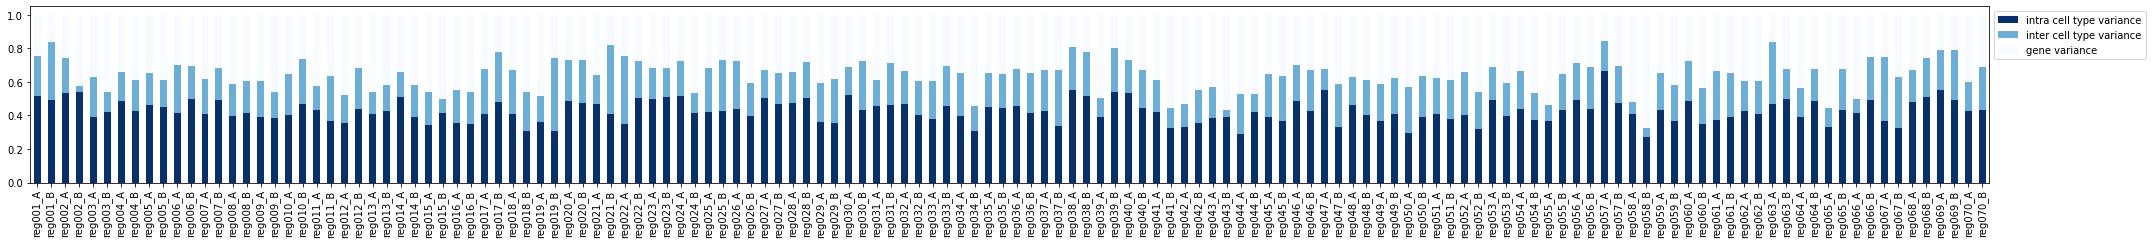

In [5]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='undefined')
interpreter.data.variance_decomposition(
    var_decomp, 
    figsize=(30, 3.5),
)

In [6]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.426698
inter cell type variance    0.212483
gene variance               0.360819
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 195.24it/s]


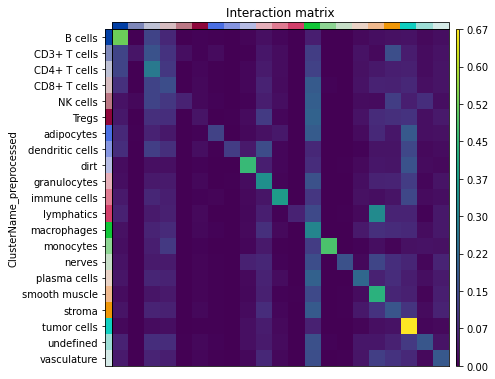

In [7]:
interpreter.data.celldata_interaction_matrix()

# Supp. Fig. 7: Ligand–receptor permutation test. 

n cells: 25226


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/squidpy/gr/_ligrec.py:453: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  self._filtered_data = self._data.loc[:, set(self.interactions[SOURCE]) | set(self.interactions[TARGET])]


  0%|          | 0/1000 [00:00<?, ?permutation/s]

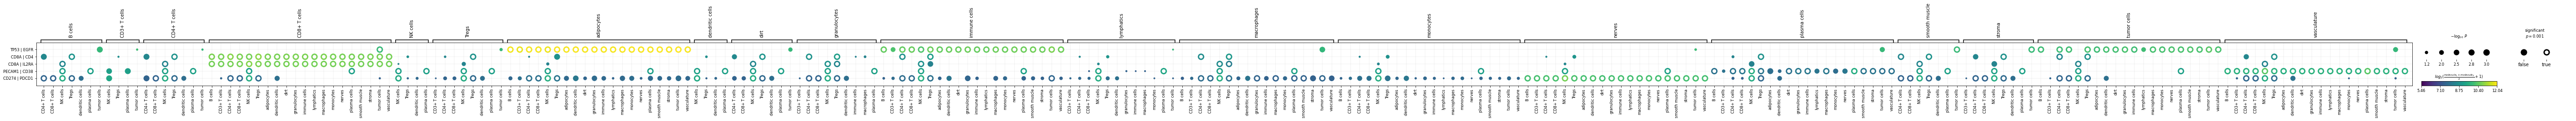

In [8]:
adata = interpreter.data.ligrec(
    undefined_type='undefined',
    fraction=0.1,
)

In [9]:
adata.uns['ClusterName_preprocessed_ligrec']['metadata'].to_csv("../cellphoneDB/codex_cancer_cellphoneDB.csv")

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

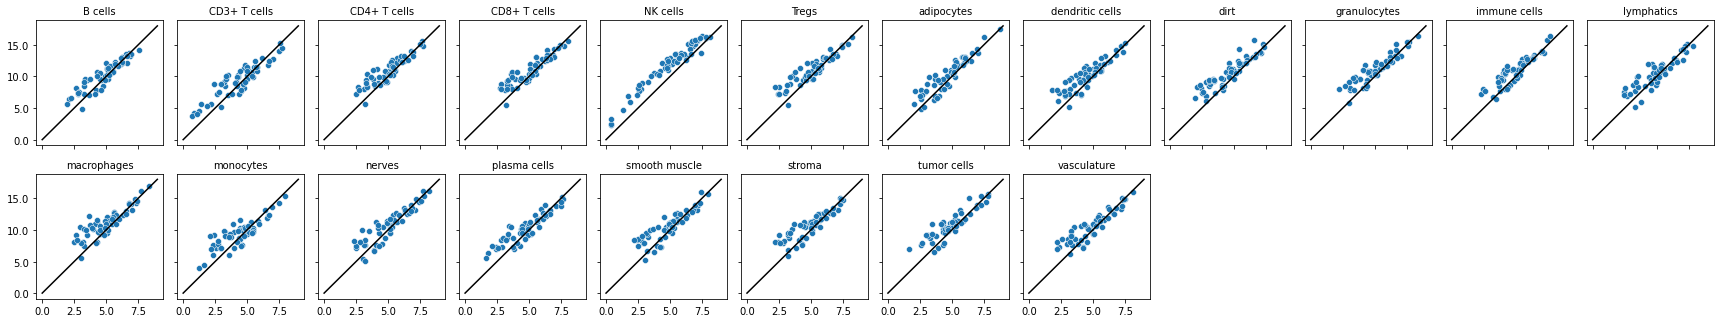

In [10]:
interpreter.data.noise_structure(
    undefined_type='undefined',
    min_x=0.0, max_x=9., 
)